In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mplsoccer import VerticalPitch 

In [2]:
df = pd.read_csv('/Users/aamirpirani/Desktop/Football Analytics/Erling Haaland Shot Map/Data/erling_haaland_2022_understat.csv')

In [3]:
df.head

<bound method NDFrame.head of          id  minute       result      X      Y        xG          player h_a  \
0    479846      20  MissedShots  0.936  0.503  0.484085  Erling Haaland   a   
1    479847      35         Goal  0.885  0.500  0.761169  Erling Haaland   a   
2    479854      64         Goal  0.864  0.405  0.328053  Erling Haaland   a   
3    479855      69  MissedShots  0.953  0.552  0.526608  Erling Haaland   a   
4    479856      75  BlockedShot  0.894  0.710  0.066443  Erling Haaland   a   
..      ...     ...          ...    ...    ...       ...             ...  ..   
118  528607       5  MissedShots  0.960  0.460  0.539977  Erling Haaland   a   
119  528612      20    SavedShot  0.901  0.539  0.435622  Erling Haaland   a   
120  528623      47  MissedShots  0.854  0.532  0.065928  Erling Haaland   a   
121  528634      65  MissedShots  0.863  0.703  0.029277  Erling Haaland   a   
122  528638      88  MissedShots  0.906  0.497  0.047078  Erling Haaland   a   

     play

### Data Cleaning

In [4]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

### Total Shots

In [5]:
total_shots = df.shape[0]

### Total Goals

In [6]:
total_goals = df[df['result'] == 'Goal'].shape[0]

### Total xG

In [7]:
total_xG = df['xG'].sum()

### xG Per Shot

In [8]:
xG_per_shot = total_xG / total_shots

### Average Distance of Shots

In [9]:
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()

print(points_average_distance, actual_average_distance)

90.2333329983843 11.720000401938833


### Total Shots

In [10]:
total_shots = len(df)

### Left Foot Shots

In [11]:
left_leg_shots = len(df[df['shotType'] == 'LeftFoot'])

### Right Foot Shots

In [12]:
right_leg_shots = len(df[df['shotType'] == 'RightFoot'])

### Headers

In [13]:
headers = len(df[df['shotType'] == 'Head'])

### Other

In [14]:
other_shots = len(df[~df['shotType'].isin(['RightFoot', 'LeftFoot', 'Head'])])

### Canvas Layout

In [15]:
background_color='#FFFFFF'

In [16]:
import matplotlib.font_manager as font_manager

In [17]:
font_path = '/Users/aamirpirani/Desktop/Football Analytics/Erling Haaland Shot Map/Utils/Arvo-Regular.ttf'

In [18]:
font_props = font_manager.FontProperties(fname=font_path)

### Visualization

In [19]:
pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='#6CABDD',
    linewidth=.75,
    axis=True, label=True
)

In [20]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
logo = mpimg.imread('/Users/aamirpirani/Desktop/Football Analytics/Erling Haaland Shot Map/Utils/Manchester_City_FC_badge.png')

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

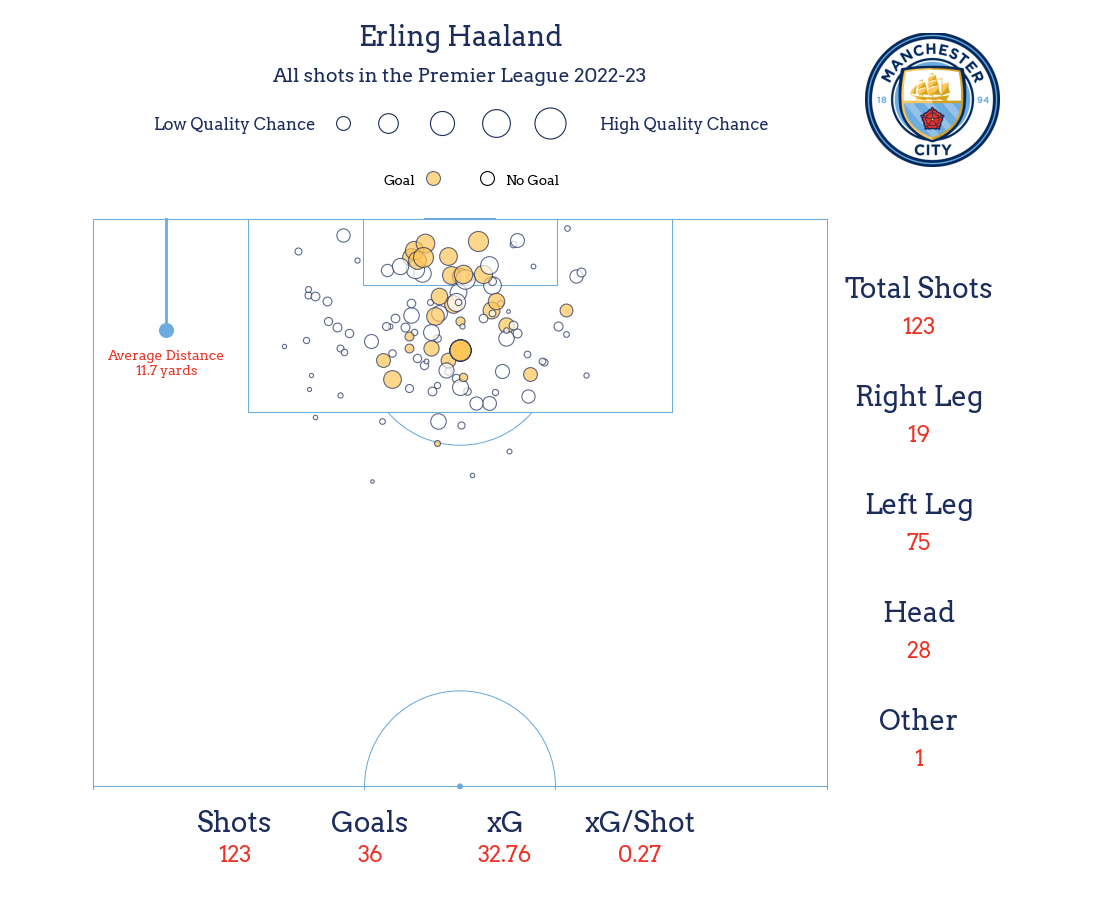

In [22]:
fig = plt.figure(figsize=(9, 12))
fig.patch.set_facecolor(background_color)


ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5, 
    y=.85, 
    s='Erling Haaland', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='#1C2C5B', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'All shots in the Premier League 2022-23', 
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props, 
    color='#1C2C5B', 
    ha='center'
)
ax1.text(
    x=0.25, 
    y=0.5, 
    s=f'Low Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='#1C2C5B', 
    ha='center'
)
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='#1C2C5B', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='#1C2C5B', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='#1C2C5B', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='#1C2C5B', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='#1C2C5B', 
    linewidth=.8
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'High Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='#1C2C5B', 
    ha='center'
)


ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='black', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='#FFC659', 
    edgecolor='#1C2C5B', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='black', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='black', 
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='#6CABDD',  
    linewidth=.8
)

ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='#6CABDD', 
    linewidth=2
)

ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='#FFC659' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='#1C2C5B'
    )
    
ax2.set_axis_off()


ax3 = fig.add_axes([0, 0.19, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='#1C2C5B', 
    ha='center'
)

ax3.text(
    x=0.25, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax3.text(
    x=0.40, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='#1C2C5B', 
    ha='center'
)

ax3.text(
    x=0.40, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax3.text(
    x=0.55, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='#1C2C5B', 
    ha='center'
)

ax3.text(
    x=0.55, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax3.text(
    x=0.70, 
    y=.5, 
    s='xG/Shot', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='#1C2C5B', 
    ha='center'
)

ax3.text(
    x=0.70, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax3.set_axis_off()

ax4 = fig.add_axes([1.0, 0.15, 0.2, 0.6])  # Adjust this to the position you want for the stats
ax4.set_facecolor(background_color)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

ax4.text(
    x=0.05, 
    y=0.85, 
    s='Total Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='#1C2C5B', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.80, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.70, 
    s='Right Leg', 
    fontsize=20, 
    fontproperties=font_props, 
    color='#1C2C5B', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.65, 
    s=f'{right_leg_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.55, 
    s='Left Leg', 
    fontsize=20, 
    fontproperties=font_props, 
    color='#1C2C5B', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.5, 
    s=f'{left_leg_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.4, 
    s='Head', 
    fontsize=20, 
    fontproperties=font_props, 
    color='#1C2C5B', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.35, 
    s=f'{headers}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.25, 
    s='Other', 
    fontsize=20, 
    fontproperties=font_props, 
    color='#1C2C5B', 
    ha='center'
)

ax4.text(
    x=0.05, 
    y=0.2, 
    s=f'{other_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#EC3325', 
    ha='center'
)

ax4.set_axis_off()


ax_logo = fig.add_axes([0.95, 0.75, 0.15, 0.15]) 
ax_logo.imshow(logo)
ax_logo.axis('off')  